C:\Users\i7 11Th\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1458/1458 ━━━━━━━━━━━━━━━━━━━━ 113s 72ms/step - loss: 0.0115
379 [[[0.37548498]
  [0.37257839]
  [0.41096892]
  ...
  [0.25194256]
  [0.23198132]
  [0.24025585]]

 [[0.37257839]
  [0.41096892]
  [0.40631204]
  ...
  [0.23198132]
  [0.24025585]
  [0.20489922]]

 [[0.41096892]
  [0.40631204]
  [0.38744675]
  ...
  [0.24025585]
  [0.20489922]
  [0.21080474]]

 ...

 [[0.52870377]
  [0.53929783]
  [0.54843579]
  ...
  [0.5291589 ]
  [0.52503961]
  [0.53428113]]

 [[0.53929783]
  [0.54843579]
  [0.54566706]
  ...
  [0.52503961]
  [0.53428113]
  [0.53952012]]

 [[0.54843579]
  [0.54566706]
  [0.54763139]
  ...
  [0.53428113]
  [0.53952012]
  [0.50077834]]]
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step
RMSE is:  0.007636701840523994


C:\Users\i7 11Th\AppData\Local\Temp\ipykernel_21492\2140755661.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction']=y_pred


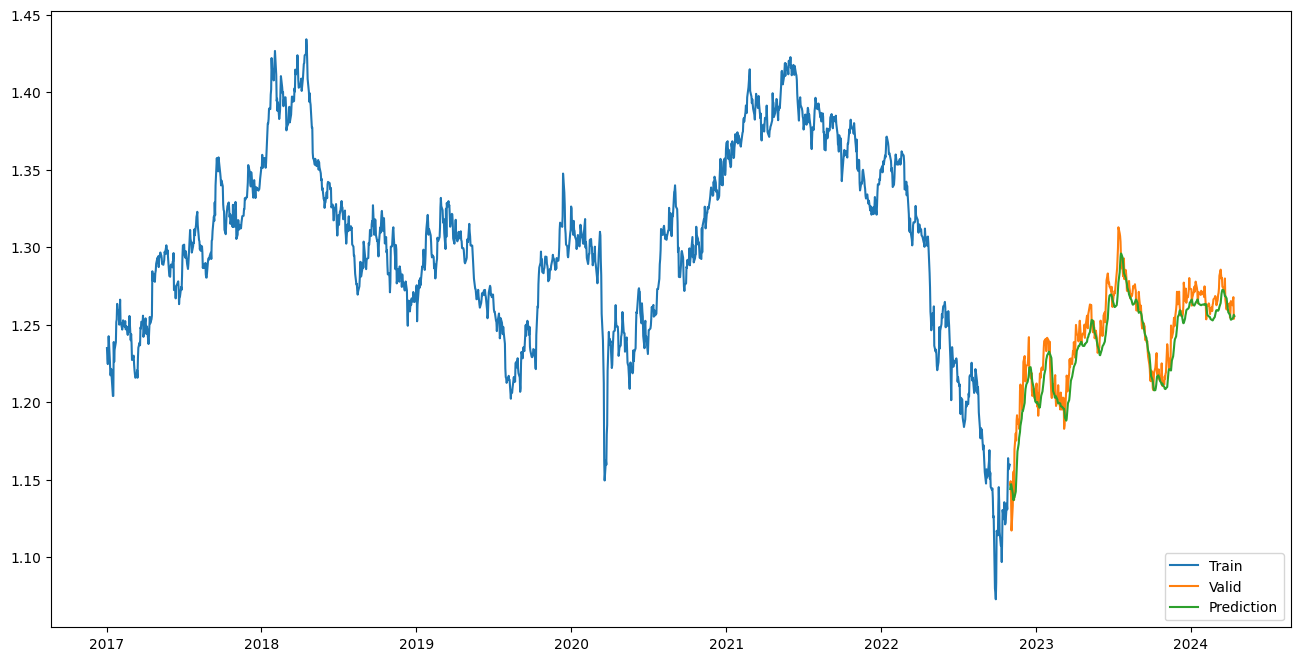

In [2]:
import math

import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
import yfinance as yahooFinance

#getting closing data

start=dt.datetime(2017,1,1)
end =dt.datetime.now()
getmsftinfo = yahooFinance.Ticker("GBPUSD=X")


data=getmsftinfo.history(start=start,end=end)
data=data.filter(['Close'])#geting only closing price
dataset=np.array(data)


train_data_len=math.ceil(len(dataset)*0.8)#calculating how much is 80% of train the model aprox
dataset=dataset.reshape(-1,1)

#Scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)



train_data=scaled_data[0:train_data_len,0]
train_data=train_data.reshape(-1,1)

#split
#x_train contains an array of arrays where each array contains closing prices of 60 days then next array contain form day 62 to 122... 
x_train=[]
#y_train contains the closing price of 61,123,...,60k+1
y_train=[]

for x in range(60,len(train_data)):
    x_train.append(train_data[x-60:x,0])
    y_train.append(train_data[x,0])
    

x_train ,y_train=np.array(x_train),np.array(y_train)#making it a numpy array
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))#reshape the x_train

#Build the LSTM model
model= Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,batch_size=1,epochs=1)

test_data=scaled_data[train_data_len-60:,:]
x_test=[]
y_test=dataset[train_data_len:,:]

for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

x_test=np.array(x_test)

x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
print(len(x_test),x_test)
y_pred=model.predict(x_test)
y_pred=scaler.inverse_transform(y_pred)

#Calcuating the accuracy using RMSE(root mean square)
rmse=np.sqrt(np.mean(y_pred-y_test)**2)
print("RMSE is: ",rmse)
#print(test_data)


#plot
train=data[:train_data_len]
valid=data[train_data_len:]
valid['Prediction']=y_pred


#visualize
plt.figure(figsize=(16,8))
plt.plot(train['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Train','Valid','Prediction'],loc='lower right')
plt.show()

In [5]:
#the next is a prediction for a single day which is next day form today and it does not need any changes each day
#because in the begining of the code it takes the data from 2017 till NOW
#x_try contains last 60 days closing price
x_try = []
for x in range(len(train_data) - 60, len(train_data)):
    x_try.append(scaled_data[x, 0])
#making some data changes so it's suitable for the model
x_try=np.array(x_try)
x_try = x_try.reshape(1, -1)
print(x_try,len(x_try))
#prediciting
y_try = model.predict([x_try])
print(y_try)
#using a method to inverse and make it readble
y_try = scaler.inverse_transform(y_try)
print("predict next day Closing Price of GBP/USD: ",y_try)

[[0.37548498 0.37257839 0.41096892 0.40631204 0.38744675 0.36778564
  0.37920652 0.36453143 0.33343491 0.30171506 0.287442   0.30577763
  0.29442831 0.30335058 0.26753155 0.27526883 0.25791174 0.24096296
  0.22725123 0.20668314 0.23209247 0.21698895 0.21919042 0.21968612
  0.24674217 0.26620804 0.21541314 0.2261444  0.2006114  0.19521377
  0.19800064 0.1806706  0.1461873  0.14846725 0.01932339 0.01253333
  0.         0.03000551 0.12225683 0.11426989 0.1678233  0.20024861
  0.17369881 0.12022159 0.09549959 0.09651737 0.0664703  0.10458313
  0.15945807 0.14293078 0.17330634 0.17063359 0.13375852 0.1366473
  0.17074044 0.16051906 0.20326272 0.25194256 0.23198132 0.24025585]] 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[0.19689626]]
predict next day:  [[1.1439226]]
